#  Trevor Maxwell
## Follow-Up Treatment Prediction - Introduction and EDA
#### D20230708

This project’s objective will be to predict whether the patient’s treatment will be done in an inpatient or an outpatient stay using the patient’s age, gender, and lab test results. An inpatient visit requires the patient to stay overnight at the hospital to receive treatment and observation whereas an outpatient visit allows the patient to go home the same day. Another difference between the two visits is that outpatient visits occur in a clinic setting away from the hospital whereas an inpatient visit requires an admission into the hospital. However, outpatient care can occur occasionally at a hospital if the patient is not admitted into the hospital. Hospitals can benefit from predicted inpatient or outpatient care for many reasons. Firstly, the costs associated with inpatient care are significantly greater than outpatient care because more care/procedures are available, the length of stay is considerably different, and inpatient stays require additional use of the facilities and supplies. Patients pay for the nursing staff, IV bags, medications used, bandages, syringes, etc., which are not always used in an outpatient visit. Inpatient care can last days, weeks, and even months whereas outpatient care can be as quick as 15 minutes. Another reason why a hospital would benefit from predicted inpatient or outpatient care is due to staffing and having beds available for the admitted patient. There are only a certain number of beds in a hospital and on each unit, so understanding whether a patient will need an inpatient stay will help with ensuring beds are available and the units are staffed. If a patient does not need an inpatient stay but is admitted, the utilization of resources in the hospital will be stretched thin because the nursing staff and doctors will give less attention to the patients that are more critically ill.
The link to the Kaggle dataset can be found [here](https://www.kaggle.com/datasets/saurabhshahane/patient-treatment-classification).

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import dataset

patient_df = pd.read_csv('data-ori.csv')

patient_df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out


In [3]:
# view shape of initial dataset 

patient_df.shape

(4412, 11)

In [4]:
# filter out patients less than 18 years
# Pediatric care is different compared to adult care, so we will focus on adult care

patient_df_adult = patient_df[patient_df['AGE'] >= 18]
patient_df_adult.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
441,41.5,13.3,4.83,2.9,217,27.5,32.0,85.9,18,F,out
442,38.9,12.8,4.66,7.7,362,27.5,32.9,83.5,18,F,out
443,38.9,12.6,4.83,9.7,307,26.1,32.4,80.5,18,F,out
444,36.9,12.5,4.16,3.1,207,30.0,33.9,88.7,18,F,out
445,37.2,12.3,4.18,8.3,306,29.4,33.1,89.0,18,F,out


In [5]:
# view shape after removing patients younger than 18

patient_df_adult.shape

(3971, 11)

In [6]:
# view summary statistics of feature variables

patient_df_adult.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000
mean,38.150290,12.729262,4.497152,8.837875,259.411483,28.469454,33.350466,85.298464,50.822967
std,6.120647,2.132265,0.791557,5.083101,114.006266,2.615690,1.241934,6.635572,18.585838
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.000000,54.000000,18.000000
25%,34.100000,11.300000,3.980000,5.800000,193.000000,27.500000,32.700000,82.500000,34.000000
50%,38.700000,12.900000,4.520000,7.700000,257.000000,28.900000,33.400000,85.900000,51.000000
75%,42.600000,14.300000,5.010000,10.400000,321.000000,30.000000,34.100000,89.100000,66.000000
max,69.000000,18.900000,7.860000,76.600000,1183.000000,40.800000,39.000000,115.600000,99.000000


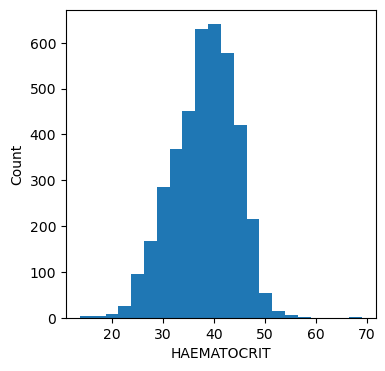

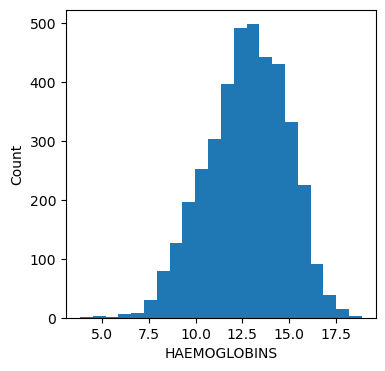

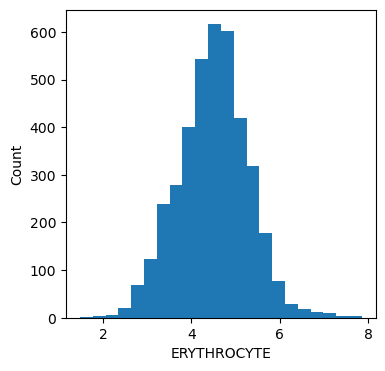

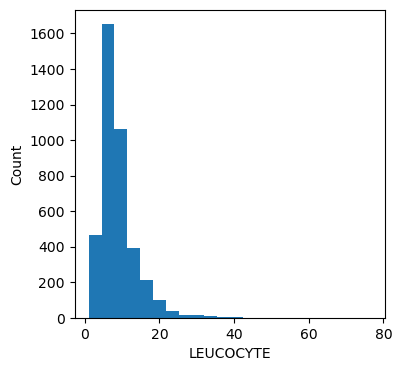

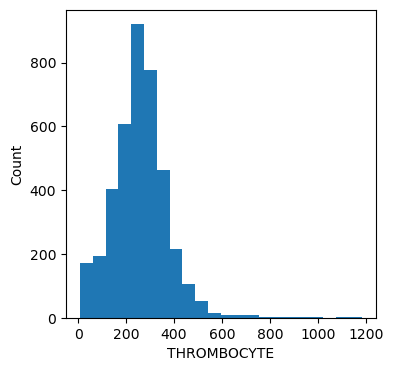

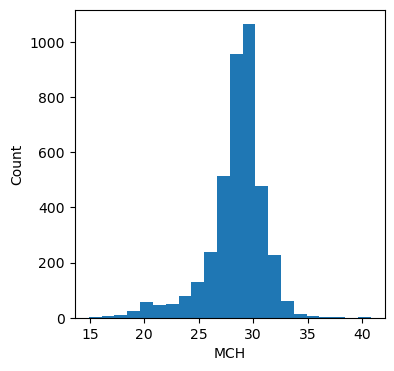

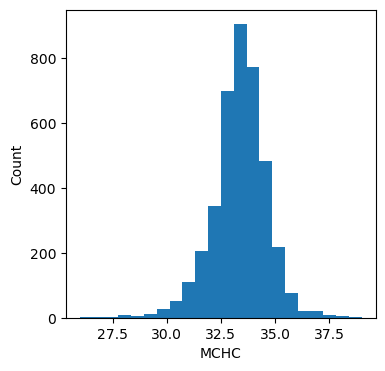

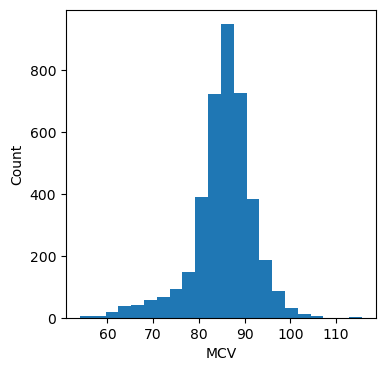

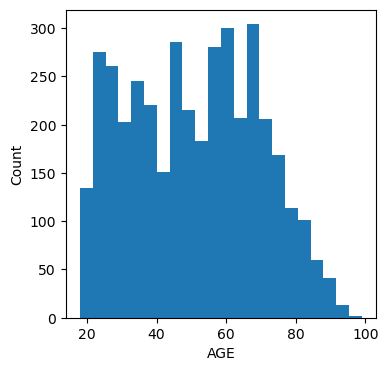

In [7]:
# view histograms for numeric variables

patient_df_adult_num = patient_df_adult.drop(columns = ['SOURCE', 'SEX'], axis = 1)

for column in patient_df_adult_num.columns:
    plt.figure(figsize = (4, 4))
    plt.hist(patient_df_adult_num[str(column)], bins = 22)
    plt.xlabel(str(column))
    plt.ylabel('Count')
    plt.show()

In [8]:
# Split in vs out for EDA visualizations

in_df = patient_df_adult[patient_df_adult['SOURCE'] == 'in']
out_df = patient_df_adult[patient_df_adult['SOURCE'] == 'out']

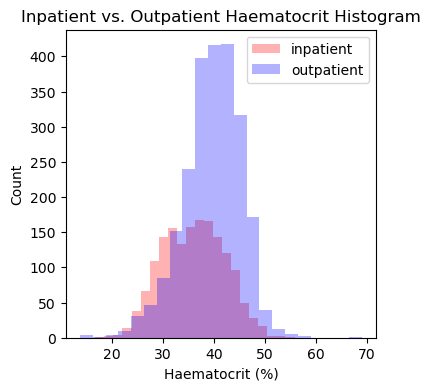

In [9]:
# create histograms a few variables showing distribution between inpatient and outpatient visits

plt.figure(figsize = (4, 4))
plt.hist(x = in_df.HAEMATOCRIT, bins = 22, color = 'red', label = 'inpatient', alpha = 0.3)
plt.hist(x = out_df.HAEMATOCRIT, bins = 22, color = 'blue', label = 'outpatient', alpha = 0.3)
plt.xlabel('Haematocrit (%)')
plt.ylabel('Count')
plt.legend()
plt.title('Inpatient vs. Outpatient Haematocrit Histogram');

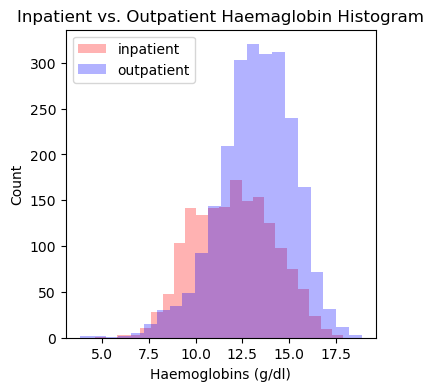

In [10]:
plt.figure(figsize = (4, 4))
plt.hist(x = in_df.HAEMOGLOBINS, bins = 22, color = 'red', label = 'inpatient', alpha = 0.3)
plt.hist(x = out_df.HAEMOGLOBINS, bins = 22, color = 'blue', label = 'outpatient', alpha = 0.3)
plt.xlabel('Haemoglobins (g/dl)')
plt.ylabel('Count')
plt.legend()
plt.title('Inpatient vs. Outpatient Haemaglobin Histogram');

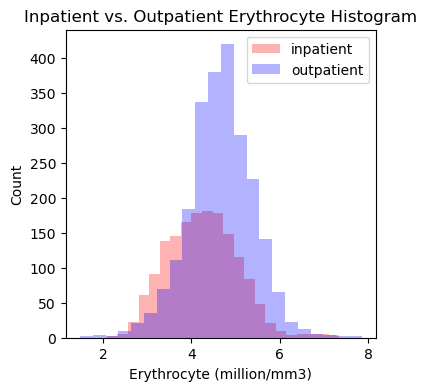

In [11]:
plt.figure(figsize = (4, 4))
plt.hist(x = in_df.ERYTHROCYTE, bins = 22, color = 'red', label = 'inpatient', alpha = 0.3)
plt.hist(x = out_df.ERYTHROCYTE, bins = 22, color = 'blue', label = 'outpatient', alpha = 0.3)
plt.xlabel('Erythrocyte (million/mm3)')
plt.ylabel('Count')
plt.legend()
plt.title('Inpatient vs. Outpatient Erythrocyte Histogram');

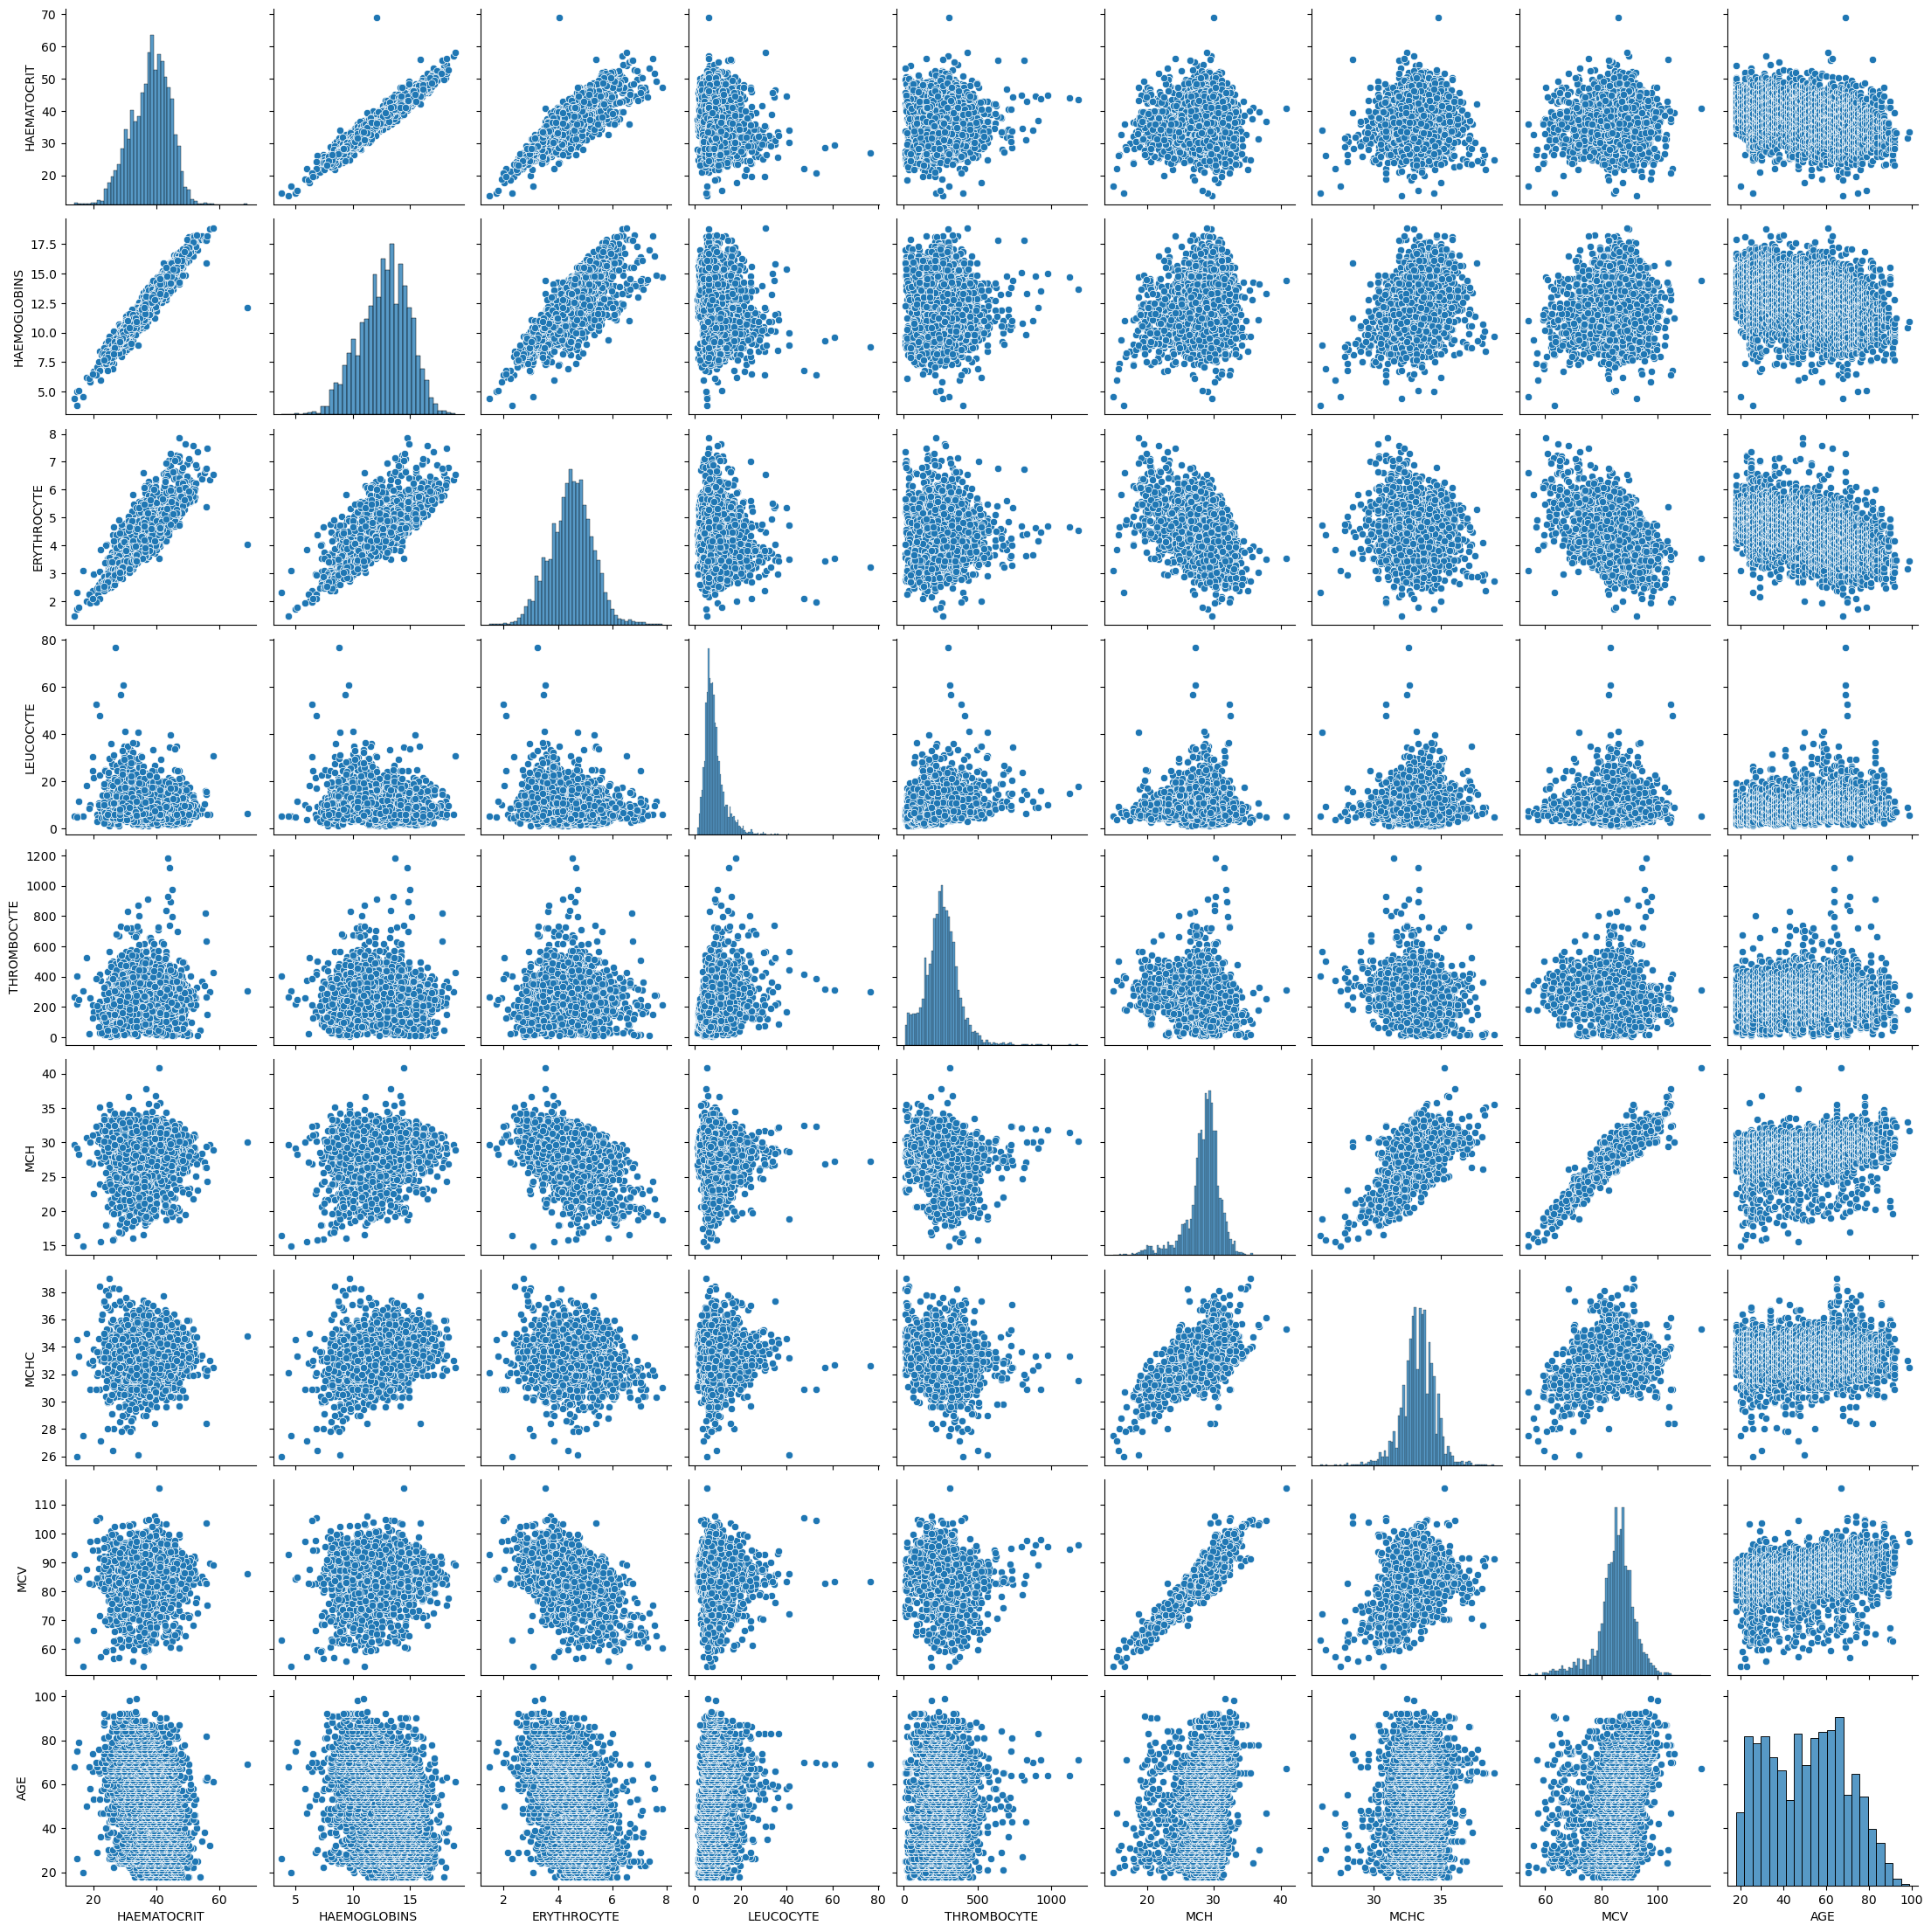

In [12]:
# view scatterplots for numeric variables

sns.pairplot(patient_df_adult_num);

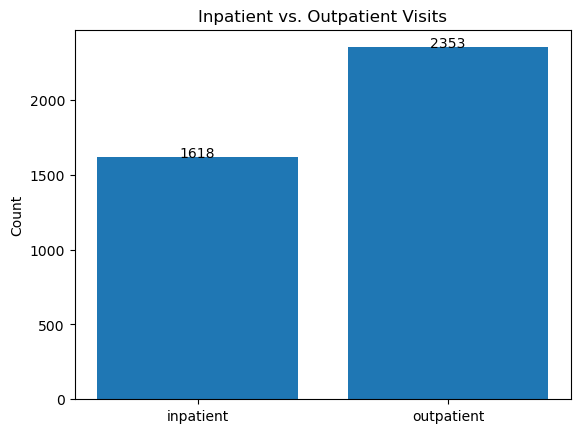

In [13]:
# view bar chart for inpatient vs. outpatient

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

in_out_counts = patient_df_adult['SOURCE'].value_counts()
stay = ['inpatient', 'outpatient']
counts = [in_out_counts[1], in_out_counts[0]]

plt.bar(x = stay, height = counts)
addlabels(stay, counts)
plt.ylabel('Count')
plt.title('Inpatient vs. Outpatient Visits');

In [14]:
num_cols_w_target = patient_df_adult.drop(columns = ['SEX'], axis = True)

C:\Users\trevo\AppData\Local\Temp\ipykernel_28740\1444681745.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = num_cols_w_target.corr()


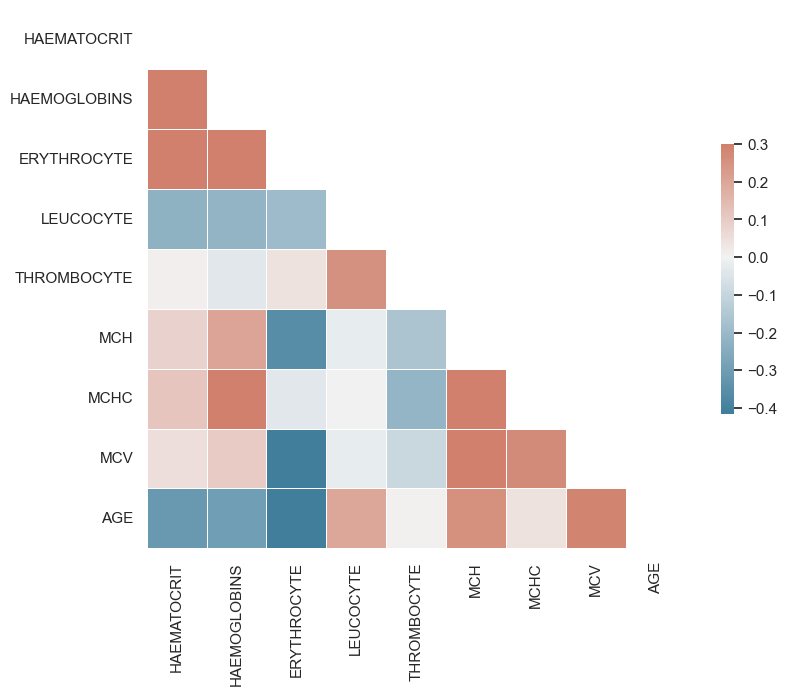

In [15]:
#create a heat map of the Pearson correlation coefficient for numeric variables

sns.set_theme(style="white")

# Compute the correlation matrix
corr = num_cols_w_target.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Observations

 - The distributions for the numerical values seem to be mostly normal with a few that may have a slight skew
 - There is a slight difference in the distributions for inpatient vs. outpatient treatments
 - 40.75% of the observations are resulted in inpatient treatment and the remaining 59.25% resulted in outpatient treatment
 - There seems to be relationships between a few of the numeric variables
 - The pearson coefficient heatmap confirms there are moderate relationships between these numerical variables